In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

from sklearn.cluster import KMeans 

from sklearn.cluster import DBSCAN 

from sklearn.metrics import silhouette_samples, silhouette_score

# Airlines

In [2]:
airlines = pd.read_excel('EastWestAirlines.xlsx')

In [3]:
airlines.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


This is not the required data for us we need to check the sheet which has the actual data that needs to be dealt with

In [4]:
airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)

In [5]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Let's now clean unwanted columns and their names to prevent code errors

In [6]:
airlines = airlines.drop(columns='ID#')

In [7]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
airlines.rename(columns={'Award?':'Award'},inplace=True)

In [9]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [11]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [12]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [13]:
airlines_main = airlines.copy()

## Columns Information

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:<br>
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:<br>
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:<br>

1 = under 5,000<br>
2 = 5,000 - 10,000<br>
3 = 10,001 - 25,000<br>
4 = 25,001 - 50,000<br>
5 = over 50,000<br>

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [14]:
airlines.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


Balance is right-skewed data since mean > median<br>
Bonus_miles is right-skewed data since mean > median<br>
Bonus_trans can be assumed as near-normal distribution there might be outliers due to wide range of the min max values<br>
Days_since_enroll can be assumed as near-normal distribution

Let's scale the data

In [15]:
ss = StandardScaler()

In [16]:
airlines_scaled = pd.DataFrame(ss.fit_transform(airlines),columns=airlines.columns)

In [17]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

In [18]:
list_cols = ['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']

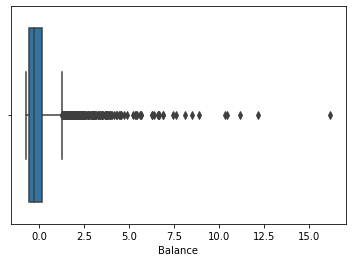

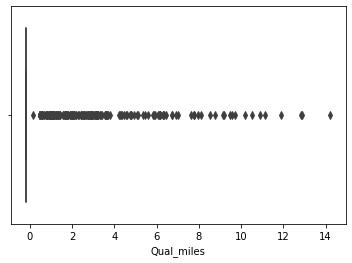

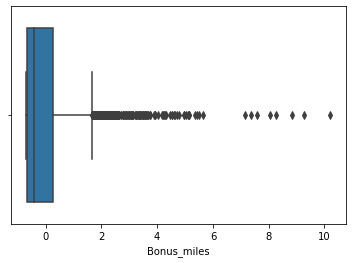

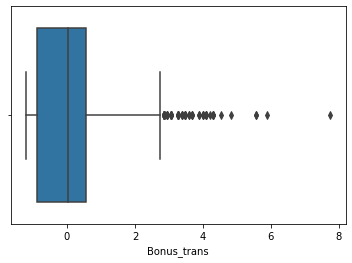

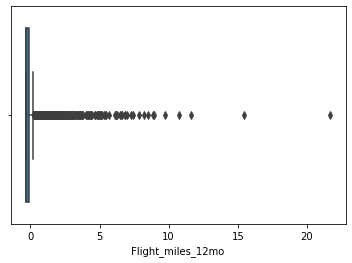

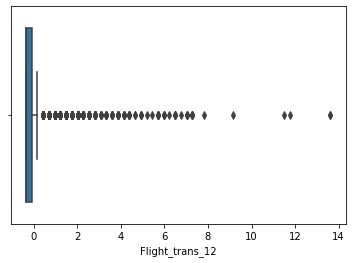

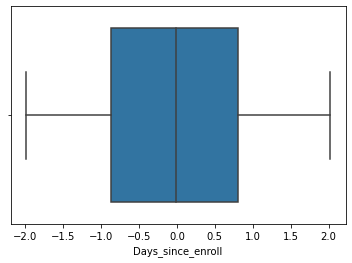

In [19]:
column_boxplots(airlines_scaled,list_cols)

In [20]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

In [21]:
outliers = ['Balance','Bonus_miles','Bonus_trans']

Distribution after outlier removal


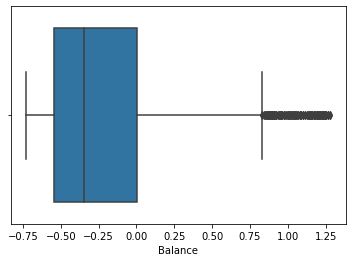

Distribution after outlier removal


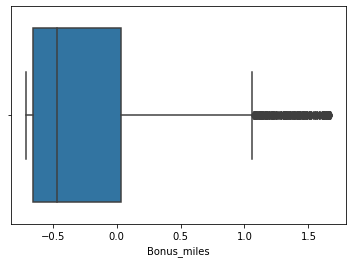

Distribution after outlier removal


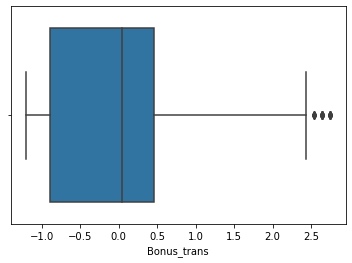

In [22]:
for i in outliers:
    outliers_to_median_values(airlines_scaled,i)

## Hierarchical Approach

In [23]:
ward_link = linkage(airlines_scaled,method='ward',metric='euclidean')

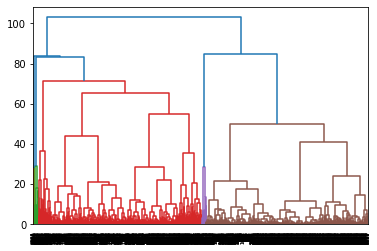

In [24]:
warddend = dendrogram(ward_link)

Considering 3 clusters

In [25]:
clusters = fcluster(ward_link,3,criterion='maxclust')
clusters

array([3, 3, 3, ..., 1, 3, 3], dtype=int32)

In [26]:
airlines['clusters'] = clusters

In [27]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [28]:
airlines_clust = airlines.groupby('clusters').mean()
airlines_clust

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
1,103203.316493,283.777613,2.793462,1.000000,1.024269,28974.016345,15.537890,823.315998,2.420010,4643.020307,0.725111
2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,42851.068663,1.221993,1.314920,1.000000,1.000000,4869.405266,7.367579,78.696438,0.264326,3575.217863,0.000000


Cluster-1<br>
This group of people have travelled around 100,000 miles to be eligible for award travel, hence most of the people in this group had a free flight. Qualifying miles for this group for top-flight status is 283. From cc1_miles, we can say that this group used the freq. flyer credit card the most. Also this group stands highest in earning bonus miles by making non-flight bonus transactions. From the data it is inferred that this group is likely to contain <b>Businessmen</b> who would frequently travel to places around for Business purposes. 

Cluster-2<br>
This group of people have travelled around 68,000 miles to be eligible for award travel, qualifying miles for this group for top-flight status is 23. From cc2_miles, we can say that this group used rewards credit card the most, also Bonus_trans is highest for this group. therefore they stand in top in making non-flight transactions.This group also has the people who had an free flight travel. From the data it is inferred that this group is likely to contain <b>High class/Tourists</b> who would frequently travel to places around the world. 

Cluster-3<br>
This group of people have travelled around 42,000 miles to be eligible for award travel, qualifying miles for this group for top-flight status is 1. From cc1_miles, cc2_miles and cc3_miles we can say that most of the people in this group used freq. flyer credit card.This group also has no people who had an free flight travel. From the data it is inferred that this group is likely to contain <b>Middle class people</b> who would travel less to places via this mode of transport.

## K-Means

In [29]:
airlines_scaled = np.array(airlines_scaled)

Let's now go with K-means approach. Here we need to give number of clusters to the model. since we don't have any idea of how many clusters would give the best output let's try to give a range of values to as cluster numbers and calculate their inertia values based on which we can conclude the best k value for the data.

In [30]:
wss = []

In [31]:
for i in range(2,30):
    KM = KMeans(n_clusters=i)
    KM.fit(airlines_scaled)
    wss.append(KM.inertia_)

In [32]:
wss

[30756.822568682343,
 26261.131449543493,
 22591.476968195493,
 20760.407481876773,
 16489.304434414134,
 14617.07878982786,
 13041.10781049471,
 11735.814068937998,
 10780.912685651667,
 10316.995577064305,
 9849.832757731876,
 9441.843624407249,
 9073.24686053534,
 8587.459030450165,
 8269.022405834388,
 7927.923080248394,
 7683.994015686759,
 7427.194596667701,
 7160.81137905803,
 6973.782921801303,
 6874.20916369956,
 6650.337883483993,
 6527.024877949928,
 6352.067095446557,
 6194.491105099625,
 6099.676683285418,
 5927.028909769112,
 5905.922683219216]

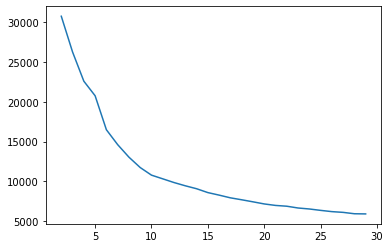

In [33]:
plt.plot(range(2,30), wss)

From the above wss/elbow plot and the inertia values, we can conculde that k=5 is the best

In [34]:
KM = KMeans(n_clusters=5)
KM.fit(airlines_scaled)

KMeans(n_clusters=5)

In [35]:
labels = KM.labels_

In [36]:
airlines['Clust_Kmeans'] = labels
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,Clust_Kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3


Let's now calculate silhouette score

In [37]:
silhouette_score(airlines_scaled,labels)

0.305969313418275

In [38]:
sil_width = silhouette_samples(airlines_scaled,labels)

In [39]:
airlines['sil_width'] = sil_width

In [40]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,Clust_Kmeans,sil_width
0,28143,0,1,1,1,174,1,0,0,7000,0,3,0,0.391145
1,19244,0,1,1,1,215,2,0,0,6968,0,3,0,0.391499
2,41354,0,1,1,1,4123,4,0,0,7034,0,3,0,0.369009
3,14776,0,1,1,1,500,1,0,0,6952,0,3,0,0.394461
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,0.355364


In [41]:
airlines[airlines['sil_width']<0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,Clust_Kmeans,sil_width
12,43382,0,2,1,1,11150,20,0,0,6924,0,3,3,-0.010502
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,1,2,-0.133363
22,20584,0,1,1,1,3450,11,3450,11,6884,0,1,2,-0.173052
42,60313,0,1,1,1,10000,26,3250,9,7829,1,1,2,-0.117916
50,108137,0,1,1,1,6368,5,6368,5,6844,0,1,2,-0.124424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,179832,2954,3,1,1,18218,20,2500,5,1569,1,1,2,-0.171628
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,1,2,-0.034697
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,1,2,-0.048258
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,1,2,-0.059532


In [42]:
silhouette_samples(airlines_scaled,labels).min()

-0.2855735028619657

From the above analysis we can say that there are <b>outliers</b> which are dragging the silhouette score down. Analysing this data might help in improving it.

In [43]:
airlines_kmeans = airlines.groupby('Clust_Kmeans').mean()
airlines_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,sil_width
Clust_Kmeans,,,,,,,,,,,,,
0,43824.050936,84.556813,1.111014,1.000000,1.000435,3807.806704,6.114933,186.895081,0.583805,3664.292120,0.193731,2.506313,0.375409
1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.000000,0.586240
2,171144.357143,1238.540816,2.117347,1.000000,1.000000,28753.545918,24.224490,4865.392857,13.959184,4609.882653,0.795918,1.000000,0.026822
3,107107.013812,94.717541,3.569061,1.000000,1.001381,36007.895028,18.250691,292.952348,0.895718,4771.982735,0.590470,1.285912,0.226076
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,2.000000,0.461581


Cluster-0<br>
This group of people have travelled around 100,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 94. From cc1_miles, we can say that this group used the freq. flyer credit card the most.

Cluster-1<br>
This group of people have travelled around 170,000 miles to be eligible for award travel, hence most of the people in this group had a free flight. Qualifying miles for this group for top-flight status is 1238. As Flight_miles_12mo is high we can say that this group has people who travel in long-distance flights.

Cluster-2<br>
This group of people have travelled around 138,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 78. From cc3_miles & cc1_miles, we can say that this group used the Small Business credit card and freq. flyer credit card the most. Also the people in this group have earned the most bonus miles by making non-flight transactions.

Cluster-3<br>
This group of people have travelled around 43,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 84. From the data of this group, we can say that this mostly has Middle class people who would travel less to places via this mode of transport.

Cluster-4<br>
This group of people have travelled around 68,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 23. From cc2_miles, we can say that this group used the Rewards credit card the most.

## DBSCAN

In [44]:
# for i in np.arange(2, 6, 1):
#     for j in range(10,15,1):
#         dbscan = DBSCAN(eps=i, min_samples=j)
#         dbscan.fit(airlines_scaled)
#         cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
#         clustered = pd.concat([airlines_main,cl],axis=1)
#         df2 = clustered[clustered['cluster']==-1]
#         df_clust = df2.groupby('cluster').mean()
#         print((i,j))
#         print(silhouette_score(airlines_scaled,dbscan.labels_))

From the above lines of code we tried multiple values of epsilon and min_samples and calculated their silhouette_score and compared the highest where we got highest value of <b>silhouette_score=0.57 </b> for <b>eps=4 and min_samples=12</b>

In [45]:
dbscan = DBSCAN(eps=4, min_samples=12)
dbscan.fit(airlines_scaled)
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
clustered = pd.concat([airlines_main,cl],axis=1)
df2 = clustered[clustered['cluster']==-1]
df_clust = df2.groupby('cluster').mean()
print(silhouette_score(airlines_scaled,dbscan.labels_))

0.5704754310533772


In [46]:
clustered.groupby('cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,
-1,137569.107143,936.750000,2.928571,1.071429,2.75,68943.892857,32.750000,5044.250000,11.535714,4203.928571,0.678571
0,73214.713159,140.006363,2.063120,1.000000,1.00,16804.336727,11.395266,427.111479,1.297786,4119.356325,0.368033
1,45781.714286,0.000000,1.000000,3.000000,1.00,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143
2,77793.642857,0.000000,1.214286,2.000000,1.00,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857


Cluster-0<br>
In Cluster 0, we find customers with moderate balances and a moderate number of miles eligible for award travel. These customers utilize their frequent flyer credit card (cc1_miles) to earn miles. They also participate in non-flight bonus transactions (Bonus_trans) and earn bonus miles (Bonus_miles). Their flight activity is characterized by a moderate number of flight miles and transactions in the past year, indicating that they are occasional travelers. With a moderate tenure in the loyalty program (Days_since_enrolled), award rates are moderate, suggesting that some customers in this group have received award flights, reflecting a moderate level of engagement with the loyalty program.

Cluster-1<br>
Cluster 1 comprises customers with the lowest balances and a lower number of miles eligible for award travel, indicating limited spending and travel activity. They do not accumulate qualifying miles, suggesting little pursuit of Topflight status. While they have a low cc1_miles, indicating limited use of their frequent flyer credit card, they rely more on their rewards credit card (cc2_miles) compared to other clusters. These customers participate in non-flight bonus transactions (Bonus_trans) and earn bonus miles (Bonus_miles) at a moderate level, indicating some engagement with promotions. Their flight activity is limited, with a low number of flight miles and transactions in the past year. With a moderate tenure in the loyalty program (Days_since_enrolled), award rates are low, indicating that customers in this cluster are less likely to receive award flights, reflecting a lower level of engagement with the loyalty program.

Cluster-2<br>
Cluster 2 consists of customers with moderate balances and a moderate number of miles eligible for award travel. They do not accumulate qualifying miles, indicating limited interest in achieving Topflight status. Although their use of the frequent flyer credit card (cc1_miles) is low, they rely more on their rewards credit card (cc2_miles) compared to some other clusters. These customers participate in non-flight bonus transactions (Bonus_trans) and earn bonus miles (Bonus_miles) at a moderate level, indicating some engagement with promotions. Their flight activity is moderate, with a moderate number of flight miles and transactions in the past year. With a moderate tenure in the loyalty program (Days_since_enrolled), award rates are moderate, suggesting that some customers in this group have received award flights, possibly due to their moderate engagement with the loyalty program.

Cluster-(-1) <b>Outliers</b><br>
Customers in Cluster -1 are enthusiastic travelers who actively participate in the airline's loyalty program. They maintain substantial account balances and have earned a large number of miles eligible for award travel, indicating significant spending and extensive travel. Many in this group are actively working towards achieving Topflight status by accumulating qualifying miles. They are dedicated users of their frequent flyer credit card (cc1_miles) and frequently engage in non-flight bonus transactions (Bonus_trans) to earn bonus miles, showing a strong commitment to loyalty rewards. These customers are characterized by their extensive flight activity, with a high number of flight miles and transactions in the past year, confirming their status as frequent travelers. Their long-standing membership in the loyalty program (Days_since_enrolled) reflects their strong loyalty, and most have received award flights, demonstrating their active involvement with the program.

# Crime Data

## Column Information

Data Description:<br>
Murder -- Muder rates in different places of United States<br>
Assualt- Assualt rate in different places of United States<br>
UrbanPop - urban population in different places of United States<br>
Rape - Rape rate in different places of United States<br>

In [47]:
cdata = pd.read_csv('crime_data.csv')

In [48]:
cdata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Let's name the first column

In [49]:
cdata.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [50]:
cdata.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
cdata['State'].value_counts().sum()

50

In [52]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [53]:
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Let's set state as index since it has all unique values

In [54]:
cdata.set_index('State',inplace=True)

In [55]:
cdata.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [56]:
cdata_main = cdata.copy()

Let's scale the data 

In [57]:
ss = StandardScaler()

In [58]:
cdata_scaled = pd.DataFrame(ss.fit_transform(cdata),columns=cdata.columns)

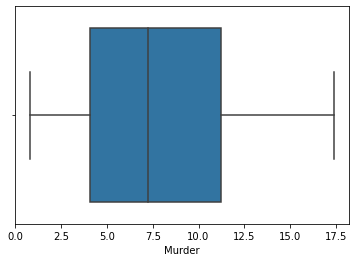

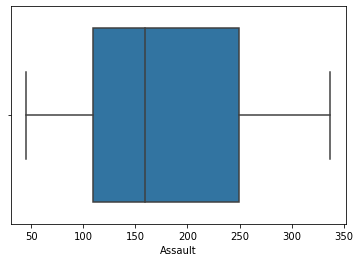

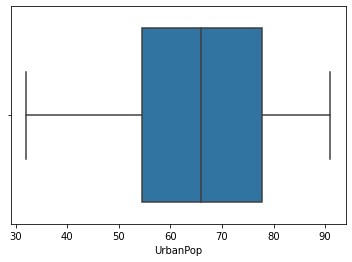

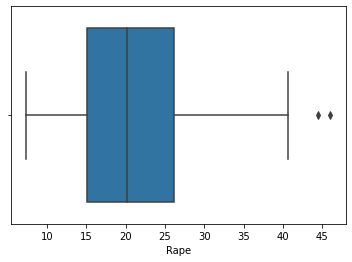

In [59]:
column_boxplots(cdata,cdata.columns)

We have Rape column with outliers let's try to remove them.

Distribution after outlier removal


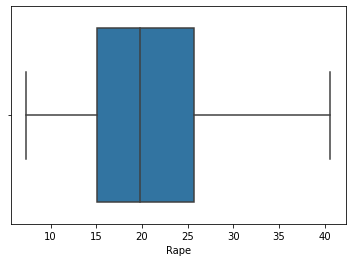

In [60]:
outliers_to_median_values(cdata,'Rape')

Based on the boxplots, <br>

UrbanPop is left-skewed data<br>
Murder is right-skewed data<br>
Rape is left-skewed data<br>
Assault is right-skewed data<br>

## Hierarchical Approach

In [61]:
ward_link = linkage(cdata_scaled,method='ward',metric='euclidean')

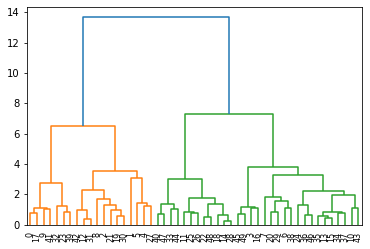

In [62]:
warddend = dendrogram(ward_link)

In [63]:
clusters = fcluster(ward_link,3,criterion='maxclust')
clusters

array([1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1,
       2, 1, 3, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [64]:
cdata['clusters'] = clusters

In [65]:
cdata.head()

,Murder,Assault,UrbanPop,Rape,clusters
State,,,,,
Alabama,13.2,236,58,21.20,1
Alaska,10.0,263,48,19.75,1
Arizona,8.1,294,80,31.00,1
Arkansas,8.8,190,50,19.50,3
California,9.0,276,91,40.60,1


In [66]:
cdata_clust = cdata.groupby('clusters').mean()
cdata_clust

,Murder,Assault,UrbanPop,Rape
clusters,,,,
1,12.331579,259.315789,68.315789,26.531579
2,3.091667,76.000000,52.083333,11.833333
3,6.210526,142.052632,71.263158,19.184211


Cluster-1<br>
This cluster has states which are having maximum crime rates across the states in US. The urban population is comparatively moderate.

Cluster-2<br>
This cluster has states which are having least crime rates across the states in US. The urban population is comparatively low.

Cluster-3<br>
This cluster has states which are having moderate crime rates across the states in US. The urban population is comparatively high.

## K-Means

In [67]:
cdata_scaled = np.array(cdata_scaled)

In [90]:
wss = []
for i in range(2,7):
    KM = KMeans(n_clusters=i)
    KM.fit(cdata_scaled)
    wss.append(KM.inertia_)

In [91]:
wss

[104.96163315756871,
 80.08569526137275,
 57.667578250008035,
 49.969202844527935,
 43.71005161878414]

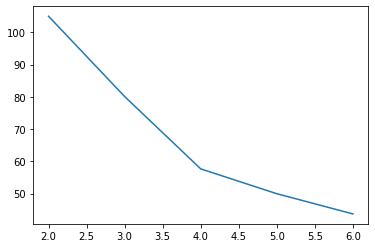

In [92]:
plt.plot(range(2,7), wss)

Let's try k=4

In [111]:
cdata.drop(columns='clusters',inplace=True)

KeyError: "['clusters'] not found in axis"

In [112]:
KM = KMeans(n_clusters=4)
KM.fit(cdata_scaled)

KMeans(n_clusters=4)

In [113]:
labels = KM.labels_

In [114]:
cdata['Clust_Kmeans'] = labels
cdata.head()

,Murder,Assault,UrbanPop,Rape,Clust_Kmeans
State,,,,,
Alabama,13.2,236,58,21.20,0
Alaska,10.0,263,48,19.75,2
Arizona,8.1,294,80,31.00,2
Arkansas,8.8,190,50,19.50,0
California,9.0,276,91,40.60,2


In [115]:
silhouette_score(cdata_scaled,labels)

0.3387340896430468

In [117]:
cdata.groupby('Clust_Kmeans').mean()

,Murder,Assault,UrbanPop,Rape
Clust_Kmeans,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.576471,136.705882,73.176471,18.647059
2,10.815385,257.384615,76.000000,29.269231
3,3.541667,76.583333,51.250000,11.816667


Cluster-0:<br>
Relatively high average values for Murder and Assault. Moderate Urban population. Relatively high average for Rape. Overall, this cluster seems to represent areas with higher crime rates, particularly in terms of violent crimes.

Cluster-1:<br>
Lower crime rates compared to Cluster 0.High Urban population. Moderate average for Rape. This cluster appears to represent urban or suburban areas with moderate crime rates, leaning towards a safer environment compared to Cluster 0.

Cluster-2: <br>
Relatively high average values for Murder and Assault. High Urban population. Relatively high average for Rape. This cluster represents densely populated urban areas facing challenges related to violent crime.

Cluster-3: <br>
Lowest crime rates among the clusters. Moderate Urban population. Lower average for Rape. This cluster represents areas with lower crime rates, indicating a relatively safer environment compared to the other clusters.

## DBSCAN 

In [168]:
for i in np.arange(1.0,1.2,0.01): 
    for j in range(2,9):
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(cdata_scaled)
        cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
        print(i,j,cl.value_counts())

1.0 2 cluster
 1         28
-1         10
 0          6
 2          3
 3          3
dtype: int64
1.0 3 cluster
 1         28
-1         10
 0          6
 2          3
 3          3
dtype: int64
1.0 4 cluster
 1         28
-1         18
 0          4
dtype: int64
1.0 5 cluster
 0         24
-1         23
 1          3
dtype: int64
1.0 6 cluster
-1         28
 0         22
dtype: int64
1.0 7 cluster
-1         28
 0         22
dtype: int64
1.0 8 cluster
-1         32
 0         18
dtype: int64
1.01 2 cluster
 1         29
-1          9
 0          6
 2          3
 3          3
dtype: int64
1.01 3 cluster
 1         29
-1          9
 0          6
 2          3
 3          3
dtype: int64
1.01 4 cluster
 1         29
-1         17
 0          4
dtype: int64
1.01 5 cluster
 0         25
-1         22
 1          3
dtype: int64
1.01 6 cluster
-1         27
 0         23
dtype: int64
1.01 7 cluster
-1         27
 0         23
dtype: int64
1.01 8 cluster
-1         30
 0         20
dtype: int64

From the above loop, best possible combination found is eps=1.1, min_samples=3

In [151]:
cdata_main.reset_index(drop=True, inplace=True)

In [203]:
dbscan = DBSCAN(eps=1.11, min_samples=4)
dbscan.fit(cdata_scaled)
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
clustered = pd.concat([cdata_main,cl],axis=1)
df2 = clustered[clustered['cluster']==-1]
df_clust = df2.groupby('cluster').mean()

In [205]:
clustered.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
-1,11.114286,254.142857,72.857143,34.757143
0,14.216667,258.000000,53.333333,21.000000
1,11.014286,262.571429,77.142857,28.800000
2,4.973333,112.433333,63.566667,16.356667


Cluster -1:<br>
This cluster might correspond to urban or suburban areas with elevated crime rates, particularly in terms of violent crimes. It may require targeted law enforcement and public safety efforts.

Cluster 0:<br>
This cluster may represent areas with high crime rates, especially in terms of violent crimes like Murder and Assault. These areas might require specific interventions to address crime and improve public safety.

Cluster 1:<br>
This cluster may correspond to densely populated urban areas with moderate to high crime rates, requiring comprehensive strategies to address public safety and community well-being.

Cluster 2:<br>
This cluster represents areas with lower crime rates, possibly indicating safer communities with less incidence of violent crimes. Policy efforts in this cluster may focus on maintaining public safety and community development.